In [1]:
# Copyright 2023 Andrew Lehr
# The MIT LICENSE

# Dynamic control of neural manifolds
#### Lehr, Kumar, & Tetzlaff

####
### Code to produce Figure 2a,c,d,e,f,g and Supp Figs S1 and S2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path as path
import os
from collections import defaultdict

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

from submanifolds.utils import get_root

### Functions

In [2]:
def sinusoidal_bump(N,amplitude,center,period,epsilon):
    bump = np.zeros(N)
    sinusoid = np.zeros(N)

    left_bound = int(N/2 - period/2)
    right_bound = int(N/2 + period/2)
    support = np.arange((left_bound+1),right_bound)

    x = np.arange(1,period)
    sine_bump = 0.5 - 0.5*np.cos(2*np.pi*x/period)
    sinusoid[support] = sine_bump
    
    bump[support] = sinusoid[support] * (1 + epsilon) / (sinusoid[support] + epsilon)
    if epsilon == 0:
        bump[left_bound] = 1

    bump = bump/np.max(bump)
    bump = amplitude*np.roll(bump, int(center - N/2))
    return bump

In [4]:
def gaussian(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def rect(x,a,x0,s):
    T = len(x)
    resp = np.zeros(T)
    resp[int(x0-s):int(x0+s)] = a
    return resp

### Set up directory to store figures

In [5]:
root = get_root()

# Figure storage
fig_top_dir = root + 'figures/'
fig_dir = fig_top_dir + 'figure_2/'

if not os.path.isdir(fig_top_dir):
    os.mkdir(fig_top_dir)
    print('Created ' + fig_top_dir)
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
    print('Created ' + fig_dir)
else:
    print('exists')
    
save_figs_flag = 0

exists


### Color palettes

In [6]:
colors = ['#586ba4', '#f68e5f', '#f5dd90',  
          '#067d7a', '#77c1b3',  '#b63653',
          '#6d2a2a', '#361a1a', '#191414', '#465865', '#928876',
          '#fc9234', '#fd6626', '#44867d', '#177070', '#404a50']

palette = ['#C47475', '#7F9CB0']

## Part I: Pipeline

### Produces Figure 2a

In [8]:
N = 1000
T = 3000
A = np.ones(T)
S = 200 * np.ones(T) 
dt = np.ones(T) 

R = np.zeros((N,T))
for t in range(T):
    x = np.arange(0,N)
    w = 0.5 - 0.5*np.cos(2*np.pi*x/N)
    w = np.roll(w, int(N/2) + int(dt[t]*t))
    R[:,t] = w

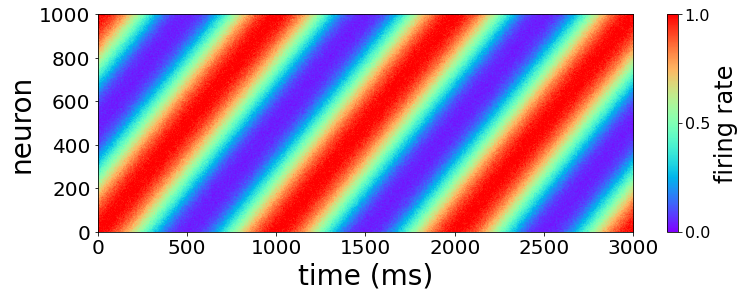

In [9]:
fname = 'noisy_raster.pdf'

noisy_R = 0.1*np.random.randn(N,T) + R
noisy_R[noisy_R<0] = 0

fig, ax = plt.subplots(figsize=(12,4))
h = plt.imshow(noisy_R, aspect='auto', origin='lower', vmin=0, vmax=1, cmap=plt.cm.rainbow)

v = np.linspace(0,1,3, endpoint=True).round(1)
ColorBar = fig.colorbar(h) # Add a colorbar to a plot
ColorBar.set_ticks(v)
ColorBar.set_ticklabels(v, fontsize=16)
ColorBar.set_label('firing rate', fontsize=24)

plt.xlabel('time (ms)', fontsize=28)
plt.ylabel('neuron', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,3000)
plt.ylim(0,1000)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

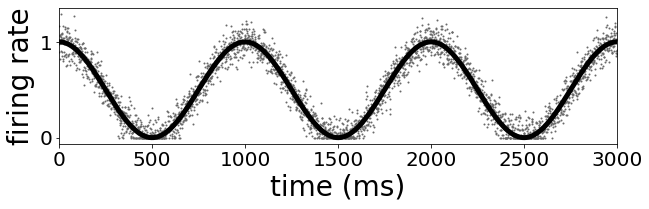

In [10]:
fname = 'example_neuron.pdf'
fig, ax = plt.subplots(figsize=(10,2.5))
plt.plot(noisy_R[0,:], '.', color='dimgrey', alpha=1, markersize=2)
plt.plot(R[0,:], color='black', linewidth=5)
plt.xlabel('time (ms)', fontsize=28)
plt.ylabel('firing rate', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks([0,1], fontsize=20)
plt.xlim(0,3000)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

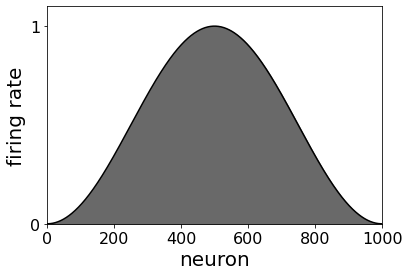

In [11]:
fname = 'bump.pdf'
plt.figure(figsize=(6,4))
plt.plot(np.arange(N), np.roll(w,500), color='black')
plt.fill_between(np.arange(N), np.zeros(N), np.roll(w,500), color='dimgrey')
plt.xlabel('neuron', fontsize=20)
plt.ylabel('firing rate', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks([0,1], fontsize=16)
plt.xlim(0,1000)
plt.ylim(0,1.1)
if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

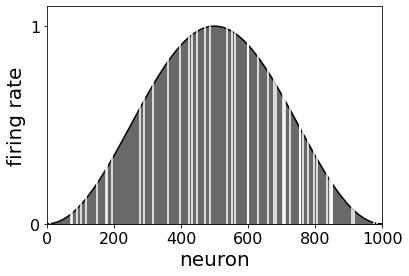

In [12]:
fname='bump_sparse.pdf'
np.random.seed(0)
plt.figure(figsize=(6,4))
plt.plot(np.arange(N), np.roll(w,500), color='black')
plt.fill_between(np.arange(N), np.zeros(N), np.roll(w,500), color='dimgrey')
for i in range(50):
    plt.vlines(ymin=0, ymax=1, x=np.random.randint(1000), color='white', alpha=1, zorder=100)
plt.xlabel('neuron', fontsize=20)
plt.ylabel('firing rate', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks([0,1], fontsize=16)
plt.xlim(0,1000)
plt.ylim(0,1.1)
if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

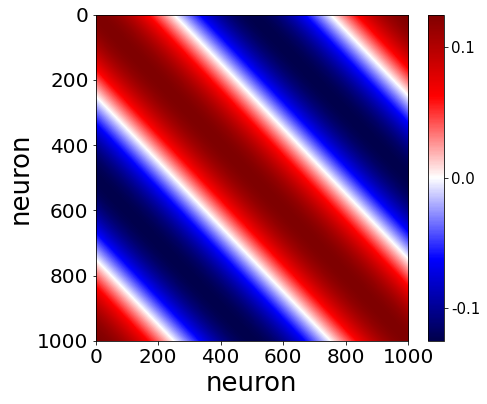

In [13]:
fname = 'covariance_matrix.pdf'
fig, ax = plt.subplots(figsize=(7,6))
C = np.cov(R)
h = plt.imshow(C, aspect='auto', origin='upper', cmap='seismic')
v = np.linspace(-.1,.1,3, endpoint=True).round(2)
ColorBar = fig.colorbar(h) # Add a colorbar to a plot
ColorBar.set_ticks(v)
ColorBar.set_ticklabels(v, fontsize=15)

plt.xlabel('neuron', fontsize=26)
plt.ylabel('neuron', fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,1000)
plt.ylim(1000,0)
if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

In [16]:
np.dot(C[:,0], np.ones(N))

-7.771561172376096e-16

In [21]:
tstart = 0
tstop = -1

In [22]:
n_components = 2

# center the data
R_centered = StandardScaler().fit_transform(R[:,tstart:tstop].T)

# compute PCA
pca = decomposition.PCA(n_components=n_components)
pca.fit(R_centered)

PCA(n_components=2)

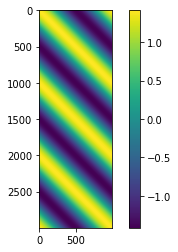

In [23]:
plt.imshow(R_centered)
plt.colorbar()

In [24]:
pca.explained_variance_ratio_.cumsum()

array([0.50008339, 1.        ])

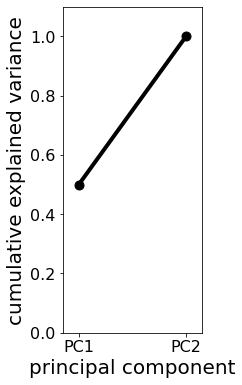

In [25]:
fname = 'exp_var.pdf'
plt.figure(figsize=(2.5,6))
plt.plot([1,2], pca.explained_variance_ratio_.cumsum(), color='black', marker='o', linewidth=4, markersize=9)
plt.xlim(0.85,2.15)
plt.ylim(0,1.1)
plt.xlabel('principal component', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20)
plt.xticks([1,2], ['PC1','PC2'], fontsize=16)
plt.yticks(fontsize=16)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

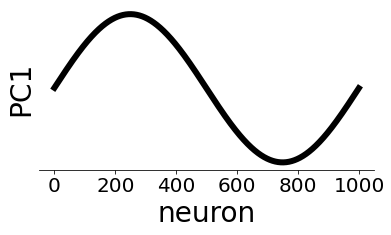

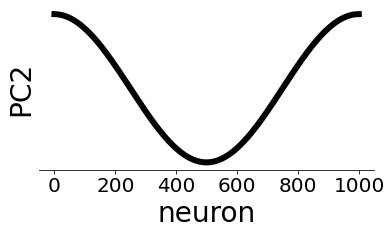

In [26]:
fh = 3
fw = 6

fname = 'pc1.pdf'
fig, ax = plt.subplots(figsize=(fw,fh))
plt.plot(pca.components_[0,:]/np.max(pca.components_[0,:]), color='black', linewidth=6)
#plt.plot((np.exp(2 * np.pi * x * 1.j / N)).imag, color='pink', linewidth=2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])
plt.xticks(fontsize=20)
plt.xlabel('neuron', fontsize=28)
plt.ylabel('PC1', fontsize=28)
if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

fname = 'pc2.pdf'
fig, ax = plt.subplots(figsize=(fw,fh))
plt.plot(pca.components_[1,:]/np.max(pca.components_[1,:]), color='black', linewidth=6)
#plt.plot((np.exp(2 * np.pi * x * 1.j / N)).real, color='pink', linewidth=2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])
plt.xticks(fontsize=20)
plt.xlabel('neuron', fontsize=28)
plt.ylabel('PC2', fontsize=28)
if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()


#### Perfect Circle

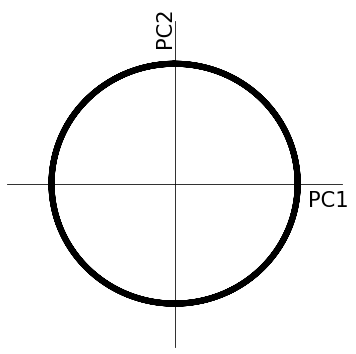

In [27]:
t_start = 0
t_stop = -1

pc0 = 0
pc1 = 1

# project
fname = 'pc_proj_circle.pdf'
ax = plt.figure(figsize=(6,6)).add_subplot()
    
proj = np.dot(pca.components_, R_centered.T)
c0 = proj[pc0,t_start:t_stop], proj[pc1,t_start:t_stop]

plt.plot(*c0, linewidth=6,  color='black') 

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim(-43,43)
plt.ylim(-43,43)
plt.xlabel('PC1', fontsize=21) #, loc='right')
plt.ylabel('PC2', fontsize=21)
ax.xaxis.set_label_coords(.96,0.48)
ax.yaxis.set_label_coords(.5,.98)
plt.xticks([])
plt.yticks([])

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

## Part II: Evaluating effect of changes to activity bump

### Part IIa: Bump size effect on trajectory radius

### Supplementary Fig. S1: Bump amplitude

In [28]:
epsilon=10000
N = 1000
T = 1000
period = 500
amplitudes = np.arange(1,5.1,0.1)
n_amplitudes = len(amplitudes)
modes = [1,2,3,4,5,6,7]
n_modes = len(modes)
mag = np.zeros((n_modes*2, n_amplitudes, N))
radius = np.zeros((n_modes, n_amplitudes))
x = np.arange(N)
dt = np.ones(T)
t0 = 500
R = np.zeros((n_amplitudes, N, T))

In [29]:
for amplitude_i, amplitude in enumerate(amplitudes):
    w = sinusoidal_bump(N,amplitude,t0,period,epsilon)
    for t in range(T):
        w = np.roll(w, int(dt[t]))
        R[amplitude_i,:,t] = w

In [31]:
pca = defaultdict(dict)
n_components = 20
R_centered = np.zeros((n_amplitudes, T, N))
for amplitude_i, amplitude in enumerate(amplitudes):
    # center the data
    R_centered[amplitude_i,:,:] = R[amplitude_i,:,:].T - np.mean(R[amplitude_i,:,:].T,axis=1) #StandardScaler().fit_transform(R[amplitude_i,:,:].T)
    
    # compute PCA
    pca[amplitude_i] = decomposition.PCA(n_components=n_components)
    pca[amplitude_i].fit(R_centered[amplitude_i,:,:])

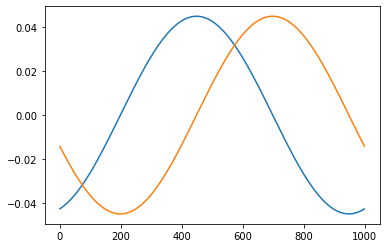

In [32]:
plt.plot(pca[2].components_[:2,:].T)

In [33]:
fourier_modes = np.zeros((int(2*n_modes),N))
radius = np.zeros((n_amplitudes, n_modes, 2))
proj = defaultdict(dict)
for amplitude_i, amplitude in enumerate(amplitudes):
    proj[amplitude_i] = np.zeros((int(2*n_modes), T))
    for mode_i, mode in enumerate(modes):
        F_0 = np.sin(2*np.pi*x / (N/mode))
        F_1 = np.cos(2*np.pi*x / (N/mode))

        proj[amplitude_i][2*mode_i] = np.dot(F_0, R_centered[amplitude_i,:,:].T)
        proj[amplitude_i][2*mode_i+1] = np.dot(F_1, R_centered[amplitude_i,:,:].T)

        fourier_modes[2*mode_i,:] = F_0
        fourier_modes[2*mode_i+1,:] = F_1

for amplitude_i, amplitude in enumerate(amplitudes):
    for mode_i, mode in enumerate(modes):
        radius[amplitude_i,mode_i,:] = np.max(proj[amplitude_i][2*mode_i:2*(mode_i+1)],axis=1)
    

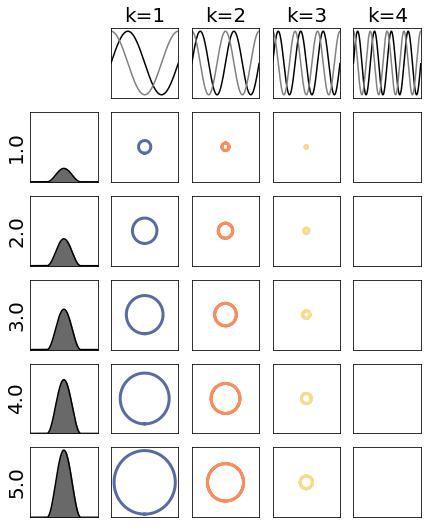

In [34]:
fname='supplement_amplitude_modulation__ampltide_affects_radius.pdf'
inds = np.arange(0,n_amplitudes,10)
amplitudes_sel = amplitudes[inds]
n_amplitudes_sel = len(amplitudes_sel)

modes_sel = [1,2,3,4]
n_modes_sel = len(modes_sel)

fig, ax = plt.subplots(1+n_amplitudes_sel, 1+n_modes_sel, figsize=(7,9))

for i, amplitude in enumerate(amplitudes_sel):
    for j, mode in enumerate(modes_sel):
        ax[i+1,j+1].plot(*proj[inds[i]][2*j:2*(j+1)], linewidth=3, color=colors[j])#'k')
        ax[i+1,j+1].set_xlim(-1.1*np.max(radius),1.1*np.max(radius))
        ax[i+1,j+1].set_ylim(-1.1*np.max(radius),1.1*np.max(radius))
        ax[i+1,j+1].set_xticks([])
        ax[i+1,j+1].set_yticks([])

for i, amplitude in enumerate(amplitudes_sel):
    ax[i+1,0].plot(x, sinusoidal_bump(N,amplitude,500,period,epsilon), color='black')
    ax[i+1,0].fill_between(x, np.zeros(N), sinusoidal_bump(N,amplitude,500,period,epsilon), color='dimgrey')
    ax[i+1,0].set_xlim(0,1000)
    ax[i+1,0].set_ylim(0,5.2)
    ax[i+1,0].set_xticks([])
    ax[i+1,0].set_yticks([])
    ax[i+1,0].set_ylabel(amplitude.round(1), fontsize=20)
    
for j, mode in enumerate(modes_sel):
    ax[0,j+1].plot(fourier_modes[2*j,:], color='black') #color='firebrick')
    ax[0,j+1].plot(fourier_modes[2*j+1,:], color='gray') #color='navy')
    ax[0,j+1].set_xlim(0,1000)
    ax[0,j+1].set_xticks([])
    ax[0,j+1].set_yticks([])
    ax[0,j+1].set_title('k='+str(mode), fontsize=20)

ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['bottom'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['left'].set_visible(False)
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

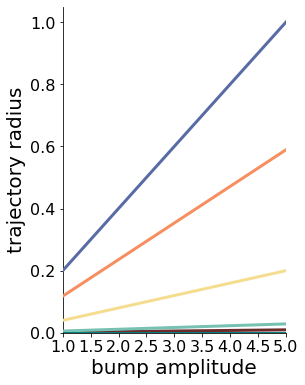

In [35]:
fname='supplement_amplitude_modulation__radius_vs_bump_amplitude.pdf'

fig, ax = plt.subplots(figsize=(4,6))
for mode_i, mode in enumerate(modes):
    plt.plot(amplitudes, radius[:,mode_i,0]/np.max(radius), zorder=20-mode_i, label=str(2*mode_i)+'-'+str(2*mode_i+1),linewidth=3, color=colors[mode_i])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(0,5.5,0.5))
ax.set_xticklabels(np.arange(0,5.5,0.5), fontsize=16)
ax.set_yticks(np.arange(0,1.2,0.2).round(1))
ax.set_yticklabels(np.arange(0,1.2,0.2).round(1), fontsize=16)
ax.set_xlabel('bump amplitude', fontsize=20)
ax.set_ylabel('trajectory radius', fontsize=20)
ax.set_xlim(1,5)
ax.set_ylim(0,1.05)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

In [36]:
cv_thr = 0.9
dim = np.zeros(n_amplitudes)
for i in range(n_amplitudes):
    var_exp_tally = 0
    j = 0
    while var_exp_tally < cv_thr and j < n_modes*2:
        var_exp_tally += pca[i].explained_variance_ratio_[2*j:2*(j+1)].sum()
        j += 1
    dim[i] = 2*j

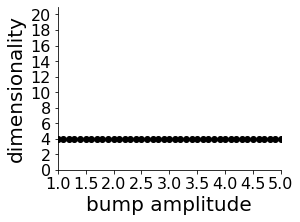

In [37]:
fname='supplement_amplitude_modulation__dimensionality.pdf'

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(amplitudes, dim, linestyle='', color='black', marker='o')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(0,5.5,0.5))
ax.set_xticklabels(np.arange(0,5.5,0.5), fontsize=16)
ax.set_yticks(np.arange(0,n_components+2,2).round(1))
ax.set_yticklabels(np.arange(0,n_components+2,2).round(1), fontsize=16)
ax.set_xlabel('bump amplitude', fontsize=20)
ax.set_ylabel('dimensionality', fontsize=20)
ax.set_xlim(1,5)
ax.set_ylim(0,21)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

### Supplementary Fig. S2: Bump shape

In [38]:
epsilons=np.arange(0,2.01,0.01)
epsilons = epsilons[::-1]
n_epsilons = len(epsilons)
N = 1000
T = 1000
period = 400
amplitude = 1
modes = [1,2,3,4,5,6,7]
n_modes = len(modes)
mag = np.zeros((n_modes*2, n_epsilons, N))
radius = np.zeros((n_modes, n_epsilons))
x = np.arange(N)
dt = np.ones(T)
t0 = 500
R = np.zeros((n_epsilons, N, T))

In [39]:
for epsilon_i, epsilon in enumerate(epsilons):
    w = sinusoidal_bump(N,amplitude,t0,period,epsilon)
    for t in range(T):
        w = np.roll(w, int(dt[t]))
        R[epsilon_i,:,t] = w

In [40]:
pca = defaultdict(dict)
n_components = 20
R_centered = np.zeros((n_epsilons, T, N))
for epsilon_i, epsilon in enumerate(epsilons):
    # center the data
    R_centered[epsilon_i,:,:] = R[epsilon_i,:,:].T - np.mean(R[epsilon_i,:,:].T,axis=1) 
    
    # compute PCA
    pca[epsilon_i] = decomposition.PCA(n_components=n_components)
    pca[epsilon_i].fit(R_centered[epsilon_i,:,:])

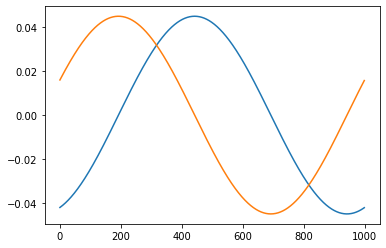

In [41]:
plt.plot(pca[2].components_[:2,:].T)

In [42]:
fourier_modes = np.zeros((int(2*n_modes),N))
radius = np.zeros((n_epsilons, n_modes, 2))
proj = defaultdict(dict)
for epsilon_i, epsilon in enumerate(epsilons):
    proj[epsilon_i] = np.zeros((int(2*n_modes), T))
    for mode_i, mode in enumerate(modes):
        F_0 = np.sin(2*np.pi*x / (N/mode))
        F_1 = np.cos(2*np.pi*x / (N/mode))

        proj[epsilon_i][2*mode_i] = np.dot(F_0, R_centered[epsilon_i,:,:].T)
        proj[epsilon_i][2*mode_i+1] = np.dot(F_1, R_centered[epsilon_i,:,:].T)

        fourier_modes[2*mode_i,:] = F_0
        fourier_modes[2*mode_i+1,:] = F_1

for epsilon_i, epsilon in enumerate(epsilons):
    for mode_i, mode in enumerate(modes):
        radius[epsilon_i,mode_i,:] = np.max(proj[epsilon_i][2*mode_i:2*(mode_i+1)],axis=1)
    

In [43]:
fourier_modes = np.zeros((int(2*n_modes),N))
radius = np.zeros((n_epsilons, n_modes, 2))
proj = defaultdict(dict)
for epsilon_i, epsilon in enumerate(epsilons):
    proj[epsilon_i] = np.zeros((int(2*n_modes), T))
    for mode_i, mode in enumerate(modes):
        F_0 = np.sin(2*np.pi*x / (N/mode))
        F_1 = np.cos(2*np.pi*x / (N/mode))

        proj[epsilon_i][2*mode_i] = np.dot(F_0, R_centered[epsilon_i,:,:].T)
        proj[epsilon_i][2*mode_i+1] = np.dot(F_1, R_centered[epsilon_i,:,:].T)

        fourier_modes[2*mode_i,:] = F_0
        fourier_modes[2*mode_i+1,:] = F_1

for epsilon_i, epsilon in enumerate(epsilons):
    for mode_i, mode in enumerate(modes):
        radius[epsilon_i,mode_i,:] = np.max(proj[epsilon_i][2*mode_i:2*(mode_i+1)],axis=1)
    

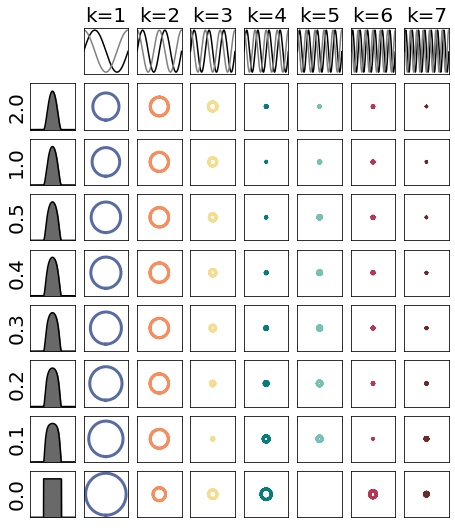

In [44]:
fname='supplement_shape_modulation__shape_affects_radius.pdf'

inds = [0,100,150,160,170,180,190,200]
#inds = np.arange(n_epsilons)
epsilons_sel = epsilons[inds]
n_epsilons_sel = len(epsilons_sel)

modes_sel = [1,2,3,4,5,6,7]
n_modes_sel = len(modes_sel)

fig, ax = plt.subplots(1+n_epsilons_sel, 1+n_modes_sel, figsize=(7.5,9))

for i, epsilon in enumerate(epsilons_sel):
    for j, mode in enumerate(modes_sel):
        ax[i+1,j+1].plot(*proj[inds[i]][2*j:2*(j+1)], linewidth=3, color=colors[j])#'k')
        ax[i+1,j+1].set_xlim(-1.1*np.max(radius),1.1*np.max(radius))
        ax[i+1,j+1].set_ylim(-1.1*np.max(radius),1.1*np.max(radius))
        ax[i+1,j+1].set_xticks([])
        ax[i+1,j+1].set_yticks([])

for i, epsilon in enumerate(epsilons_sel):
    ax[i+1,0].plot(x, sinusoidal_bump(N,amplitude,500,period,epsilon), color='black')
    ax[i+1,0].fill_between(x, np.zeros(N), sinusoidal_bump(N,amplitude,500,period,epsilon), color='dimgrey')
    ax[i+1,0].set_xlim(0,1000)
    ax[i+1,0].set_ylim(0,1.2)
    ax[i+1,0].set_xticks([])
    ax[i+1,0].set_yticks([])
    ax[i+1,0].set_ylabel(epsilon.round(1), fontsize=20)
    
for j, mode in enumerate(modes_sel):
    ax[0,j+1].plot(fourier_modes[2*j,:], color='black') #color='firebrick')
    ax[0,j+1].plot(fourier_modes[2*j+1,:], color='gray') #color='navy')
    ax[0,j+1].set_xlim(0,1000)
    ax[0,j+1].set_xticks([])
    ax[0,j+1].set_yticks([])
    ax[0,j+1].set_title('k='+str(mode), fontsize=20)

ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['bottom'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['left'].set_visible(False)
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

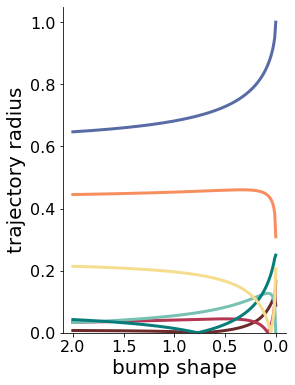

In [45]:
fname='supplement_shape_modulation__radius_vs_bump_shape.pdf'
fig, ax = plt.subplots(figsize=(4,6))
for mode_i, mode in enumerate(modes):
    plt.plot(np.arange(n_epsilons), radius[:,mode_i,0]/np.max(radius), zorder=20-mode_i, label=str(2*mode_i)+'-'+str(2*mode_i+1),linewidth=3, color=colors[mode_i])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(0,250,50))
ax.set_xticklabels(epsilons[::50], fontsize=16)
ax.set_yticks(np.arange(0,1.2,0.2).round(1))
ax.set_yticklabels(np.arange(0,1.2,0.2).round(1), fontsize=16)
ax.set_xlabel('bump shape', fontsize=20)
ax.set_ylabel('trajectory radius', fontsize=20)
ax.set_ylim(0,1.05)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

In [46]:
cv_thr = 0.9
dim = np.zeros(n_epsilons)
for i in range(n_epsilons):
    var_exp_tally = 0
    j = 0
    while var_exp_tally < cv_thr and j < n_modes*2:
        var_exp_tally += pca[i].explained_variance_ratio_[2*j:2*(j+1)].sum()
        j += 1
    #dim[i] = np.where(pca[i].explained_variance_ratio_.cumsum() > cv_thr)[0][0] + 1
    dim[i] = 2*j

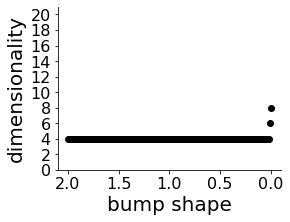

In [47]:
fname='supplement_shape_modulation__dimensionality.pdf'
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(np.arange(n_epsilons), dim, linestyle='', color='black', marker='o')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(0,250,50))
ax.set_xticklabels(epsilons[::50], fontsize=16)
ax.set_xlabel('bump shape', fontsize=20)
ax.set_yticks(np.arange(0,n_components+2,2).round(1))
ax.set_yticklabels(np.arange(0,n_components+2,2).round(1), fontsize=16)
ax.set_ylabel('dimensionality', fontsize=20)
ax.set_ylim(0,21)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

### Figure 2c,d,e: Bump width

In [48]:
epsilon=10000
N = 1000
T = 1000
periods = np.arange(10,N+10,10)
n_periods = len(periods)
modes = [1,2,3,4,5,6,7]
n_modes = len(modes)
mag = np.zeros((n_modes*2, n_periods, N))
radius = np.zeros((n_modes, n_periods))
x = np.arange(N)
dt = np.ones(T)
t0 = 500
R = np.zeros((n_periods, N, T))

In [49]:
for period_i, period in enumerate(periods):
    w = sinusoidal_bump(N,amplitude,t0,period,epsilon)
    for t in range(T):
        w = np.roll(w, int(dt[t]))
        R[period_i,:,t] = w

In [50]:
pca = defaultdict(dict)
n_components = 20
R_centered = np.zeros((n_periods, T, N))
for period_i, period in enumerate(periods):
    # center the data
    R_centered[period_i,:,:] = StandardScaler().fit_transform(R[period_i,:,:].T)
    
    # compute PCA
    pca[period_i] = decomposition.PCA(n_components=n_components)
    pca[period_i].fit(R_centered[period_i,:,:])

In [51]:
fourier_modes = np.zeros((int(2*n_modes),N))
radius = np.zeros((n_periods, n_modes, 2))
proj = defaultdict(dict)
for period_i, period in enumerate(periods):
    proj[period_i] = np.zeros((int(2*n_modes), T))
    for mode_i, mode in enumerate(modes):
        F_0 = np.sin(2*np.pi*x / (N/mode))
        F_1 = np.cos(2*np.pi*x / (N/mode))

        proj[period_i][2*mode_i] = np.dot(F_0, R_centered[period_i,:,:].T)
        proj[period_i][2*mode_i+1] = np.dot(F_1, R_centered[period_i,:,:].T)

        fourier_modes[2*mode_i,:] = F_0
        fourier_modes[2*mode_i+1,:] = F_1

for period_i, period in enumerate(periods):
    for mode_i, mode in enumerate(modes):
        radius[period_i,mode_i,:] = np.max(proj[period_i][2*mode_i:2*(mode_i+1)],axis=1)
    

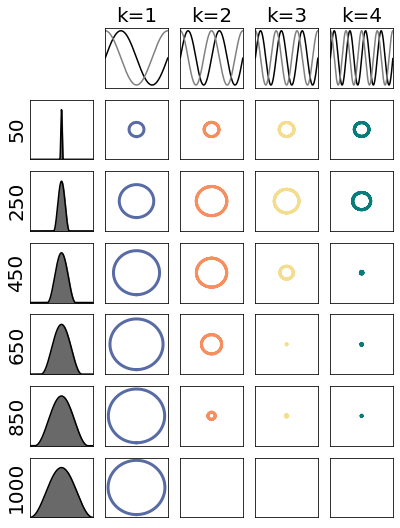

In [52]:
fname='width_modulation__width_affects_radius.pdf'
inds = np.arange(4,100,20)
inds = np.concatenate([inds, [99]])
periods_sel = periods[inds]
n_periods_sel = len(periods_sel)

modes_sel = [1,2,3,4]
n_modes_sel = len(modes_sel)

fig, ax = plt.subplots(1+n_periods_sel, 1+n_modes_sel, figsize=(6.5,9))

for i, period in enumerate(periods_sel):
    for j, mode in enumerate(modes_sel):
        #ax[i+1,j+1].scatter(*proj[inds[i]][2*j:2*(j+1)], marker='.', s=3, color=colors[j])#'k')
        ax[i+1,j+1].plot(*proj[inds[i]][2*j:2*(j+1)], linewidth=3, color=colors[j])#'k')
        ax[i+1,j+1].set_xlim(-1.1*np.max(radius),1.1*np.max(radius))
        ax[i+1,j+1].set_ylim(-1.1*np.max(radius),1.1*np.max(radius))
        ax[i+1,j+1].set_xticks([])
        ax[i+1,j+1].set_yticks([])

for i, period in enumerate(periods_sel):
    ax[i+1,0].plot(x, sinusoidal_bump(N,amplitude,500,period,epsilon), color='black')
    ax[i+1,0].fill_between(x, np.zeros(N), sinusoidal_bump(N,amplitude,500,period,epsilon), color='dimgrey')
    ax[i+1,0].set_xlim(0,1000)
    ax[i+1,0].set_ylim(0,1.2)
    ax[i+1,0].set_xticks([])
    ax[i+1,0].set_yticks([])
    ax[i+1,0].set_ylabel(period, fontsize=20)
    
for j, mode in enumerate(modes_sel):
    ax[0,j+1].plot(fourier_modes[2*j,:], color='black') #color='firebrick')
    ax[0,j+1].plot(fourier_modes[2*j+1,:], color='gray') #color='navy')
    ax[0,j+1].set_xlim(0,1000)
    ax[0,j+1].set_xticks([])
    ax[0,j+1].set_yticks([])
    ax[0,j+1].set_title('k='+str(mode), fontsize=20)

ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['bottom'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['left'].set_visible(False)
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

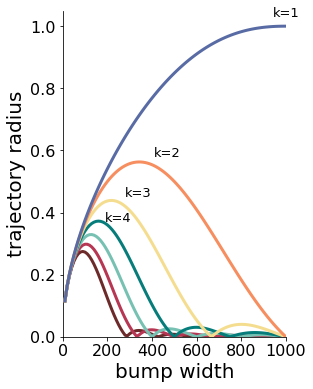

In [53]:
fname='width_modulation__radius_vs_bump_width.pdf'
fig, ax = plt.subplots(figsize=(4,6))
for mode_i, mode in enumerate(modes):
    plt.plot(periods, radius[:,mode_i,0]/np.max(radius), zorder=20-mode_i, label=str(2*mode_i)+'-'+str(2*mode_i+1),linewidth=3, color=colors[mode_i])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(0,1200,200))
ax.set_xticklabels(np.arange(0,1200,200), fontsize=16)
ax.set_yticks(np.arange(0,1.2,0.2).round(1))
ax.set_yticklabels(np.arange(0,1.2,0.2).round(1), fontsize=16)
ax.set_xlabel('bump width', fontsize=20)
ax.set_ylabel('trajectory radius', fontsize=20)
ax.set_xlim(0,1000)
ax.set_ylim(0,1.05)
ax.text(940,1.03, s='k=1',fontsize=13)
ax.text(410,.58, s='k=2',fontsize=13)
ax.text(280,.45, s='k=3',fontsize=13)
ax.text(190,.37, s='k=4',fontsize=13)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

In [54]:
cv_thr = 0.9
dim = np.zeros(n_periods)
for i in range(n_periods):
    var_exp_tally = 0
    j = 0
    while var_exp_tally < cv_thr and j < n_modes*2:
        var_exp_tally += pca[i].explained_variance_ratio_[2*j:2*(j+1)].sum()
        j += 1
    dim[i] = 2*j

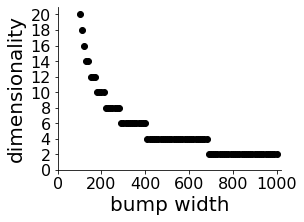

In [55]:
fname='width_modulation__dimensionality.pdf'
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(periods, dim, linestyle='', color='black', marker='o')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(np.arange(0,1200,200))
ax.set_xticklabels(np.arange(0,1200,200), fontsize=16)
ax.set_yticks(np.arange(0,n_components+2,2).round(1))
ax.set_yticklabels(np.arange(0,n_components+2,2).round(1), fontsize=16)
ax.set_xlabel('bump width', fontsize=20)
ax.set_ylabel('dimensionality', fontsize=20)
ax.set_xlim(0,1020)
ax.set_ylim(0,21)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

### Part IIb: Bump speed effect on trajectory rotation speed and tangential speed
#### Produces Figure 2f,g

In [57]:
epsilon=10000
N = 1000
T = 1000

periods = np.arange(10,N+10,10)
n_periods = len(periods)

modes = [1,2,3,4]
n_modes = len(modes)

amplitude = 1
x = np.arange(N)
t0 = 500
top_speed = 20
dts = np.arange(1,top_speed)
n_dts = len(dts)
R_speed = np.zeros((n_periods, n_dts, N, T))

for period_i, period in enumerate(periods):
    for dt_i, dt_val in enumerate(dts):
        dt = dt_val*np.ones(T)
        w = sinusoidal_bump(N,amplitude,t0,period,epsilon)
        for t in range(T):
            w = np.roll(w, int(dt[t]))
            R_speed[period_i,dt_i,:,t] = w

In [58]:
fourier_modes = np.zeros((int(n_modes*2), N))
for mode_i, mode in enumerate(modes):
    F_0 = np.sin(2*np.pi*x / (N/mode))
    F_1 = np.cos(2*np.pi*x / (N/mode))
    fourier_modes[2*mode_i,:] = F_0
    fourier_modes[2*mode_i+1,:] = F_1

In [59]:
R_speed_centered = np.zeros((n_periods, n_dts, T, N))
for period_i, period in enumerate(periods):
    for dt_i, dt_val in enumerate(dts):
        # center the data
        R_speed[period_i,dt_i,:,:] = StandardScaler().fit_transform(R_speed[period_i,dt_i,:,:].T)

In [60]:
proj_speed = defaultdict(dict)
proj_speed_norm = defaultdict(dict)
radius_speed = np.zeros((n_periods, n_dts, n_modes, 2))
#fourier_modes = np.zeros((int(2*n_modes),N))
for period_i, period_val in enumerate(periods):
    for dt_i, dt_val in enumerate(dts):
        proj_speed[period_i, dt_i] = np.zeros((int(2*n_modes), T))
        proj_speed_norm[period_i, dt_i] = np.zeros((int(2*n_modes), T))
        for mode_i, mode in enumerate(modes):
            proj_speed[period_i, dt_i][2*mode_i,:] = np.dot(fourier_modes[2*mode_i], R_speed[period_i, dt_i,:,:].T)
            proj_speed[period_i, dt_i][2*mode_i+1,:] = np.dot(fourier_modes[2*mode_i+1], R_speed[period_i, dt_i,:,:].T)
    
            radius_speed[period_i, dt_i,mode_i,:] = np.max(proj_speed[period_i, dt_i][2*mode_i:2*(mode_i+1)],axis=1)
    
            if np.max(radius_speed[period_i, dt_i,mode_i,:]) > 0:
                proj_speed_norm[period_i, dt_i][2*mode_i] = proj_speed[period_i, dt_i][2*mode_i,:] / np.max(radius_speed[period_i, dt_i,mode_i,:]) 
                proj_speed_norm[period_i, dt_i][2*mode_i+1] = proj_speed[period_i, dt_i][2*mode_i+1,:] / np.max(radius_speed[period_i, dt_i,mode_i,:])
            else:
                proj_speed_norm[period_i, dt_i][2*mode_i] = proj_speed[period_i, dt_i][2*mode_i,:]
                proj_speed_norm[period_i, dt_i][2*mode_i] = proj_speed[period_i, dt_i][2*mode_i+1,:]

In [61]:
rot_sec = np.zeros((n_periods,n_dts,n_modes))
rot_sec_std = np.zeros((n_periods,n_dts,n_modes))
for k in range(n_periods):
    for i in range(n_dts):
        for j in range(n_modes):
            rot_sec[k,i,j] = np.mean(((T-1)/(2*np.pi))*np.sqrt((proj_speed_norm[k,i][2*j,1:] - proj_speed_norm[k,i][2*j,:-1])**2 + 
                                            (proj_speed_norm[k,i][2*j+1,1:] - proj_speed_norm[k,i][2*j+1,:-1])**2)).round(1)
            rot_sec_std[k,i,j] = np.std(((T-1)/(2*np.pi))*np.sqrt((proj_speed_norm[k,i][2*j,1:] - proj_speed_norm[k,i][2*j,:-1])**2 + 
                                            (proj_speed_norm[k,i][2*j+1,1:] - proj_speed_norm[k,i][2*j+1,:-1])**2)).round(10)

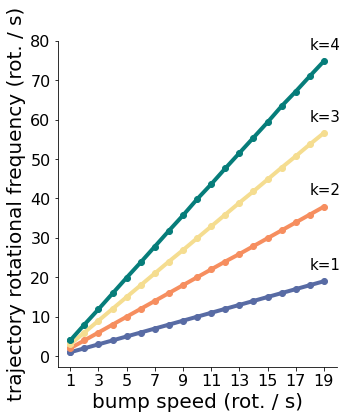

In [62]:
fname = 'trajectory_speed_vs_bump_speed.pdf'
ppp = -1

fig, ax = plt.subplots(figsize=(5,6))
for jjj in range(n_modes):
    ax.plot(dts, rot_sec[ppp,:,jjj], color=colors[jjj], linewidth=4, marker='o')
    ax.scatter(dts[0],rot_sec[ppp,0,jjj], color=colors[jjj], zorder=10)
    ax.text(x=dts[-2],y=3+rot_sec[ppp,-1,jjj], s='k=' + str(modes[jjj]),fontsize=15)
           
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks(dts[::2])
ax.set_xticklabels(dts[::2], fontsize=16)
ax.set_yticks(np.arange(0,90,10).round(1))
ax.set_yticklabels(np.arange(0,90,10).round(1), fontsize=16)
ax.set_xlabel('bump speed (rot. / s)', fontsize=20)
ax.set_ylabel('trajectory rotational frequency (rot. / s)', fontsize=20)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

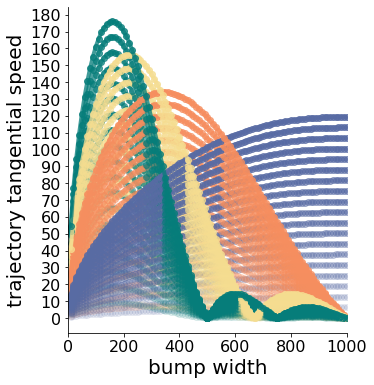

In [63]:
fname = 'trajectory_tangential_speed_vs_bump_speed.pdf'

fig, ax = plt.subplots(figsize=(5,6))
for ddd in range(n_dts):
    for jjj in range(n_modes):
        ax.plot(periods, 2*np.pi*radius_speed[:,ddd,jjj,0]*rot_sec[:,ddd,jjj]/np.max(radius_speed), color=colors[jjj], linewidth=4, marker='o', alpha=.1+0.7*ddd/n_dts)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0,1200,200))
ax.set_xticklabels(np.arange(0,1200,200), fontsize=16)
ax.set_yticks(np.arange(0,190,10).round(1))
ax.set_yticklabels(np.arange(0,190,10).round(1), fontsize=16)
ax.set_xlabel('bump width', fontsize=20)
ax.set_ylabel('trajectory tangential speed', fontsize=20)
ax.set_xlim(0,1000)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()